<a href="https://colab.research.google.com/github/WhiteBeyond/AI/blob/main/Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
%cd /content/drive/MyDrive/MidTerm/Flower

/content/drive/MyDrive/MidTerm/Flower


In [4]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
# Tạo bộ dữ liệu training set
training_set=train.flow_from_directory('/content/drive/MyDrive/MidTerm/Flower/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 369 images belonging to 5 classes.


In [6]:
training_set.class_indices

{'bougainvillea': 0, 'daisies': 1, 'hydrangeas': 2, 'lilies': 3, 'tulip': 4}

In [10]:
# Tạo ra mạng CNN để train mô hình

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='linear', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear', kernel_initializer='he_uniform', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear', kernel_initializer='he_uniform', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(256, (3, 3), activation='linear', kernel_initializer='he_uniform', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())  # modify input_shape 
model.add(Dense(512, activation='linear', kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))
model.add(Dense(256, activation='linear', kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                  

In [11]:
history = model.fit(training_set, epochs=20, batch_size=128, verbose=1)

Epoch 1/20
12/12 [==============================] - 150s 12s/step - loss: 5.6247 - accuracy: 0.3089
Epoch 2/20
12/12 [==============================] - 57s 5s/step - loss: 1.1058 - accuracy: 0.5718
Epoch 3/20
12/12 [==============================] - 50s 4s/step - loss: 0.9587 - accuracy: 0.6125
Epoch 4/20
12/12 [==============================] - 49s 4s/step - loss: 0.7262 - accuracy: 0.7317
Epoch 5/20
12/12 [==============================] - 50s 4s/step - loss: 0.7026 - accuracy: 0.7209
Epoch 6/20
12/12 [==============================] - 48s 4s/step - loss: 0.6123 - accuracy: 0.7642
Epoch 7/20
12/12 [==============================] - 48s 4s/step - loss: 0.5778 - accuracy: 0.7967
Epoch 8/20
12/12 [==============================] - 50s 4s/step - loss: 0.5558 - accuracy: 0.8211
Epoch 9/20
12/12 [==============================] - 49s 4s/step - loss: 0.4407 - accuracy: 0.8184
Epoch 10/20
12/12 [==============================] - 48s 4s/step - loss: 0.4598 - accuracy: 0.8266
Epoch 11/20
12/12

In [12]:
model.save('/content/drive/MyDrive/MidTerm/Flower/Flower_model.h5')

In [13]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.07375145703554153
Train Accuracy 0.9837398529052734


<function matplotlib.pyplot.show(close=None, block=None)>

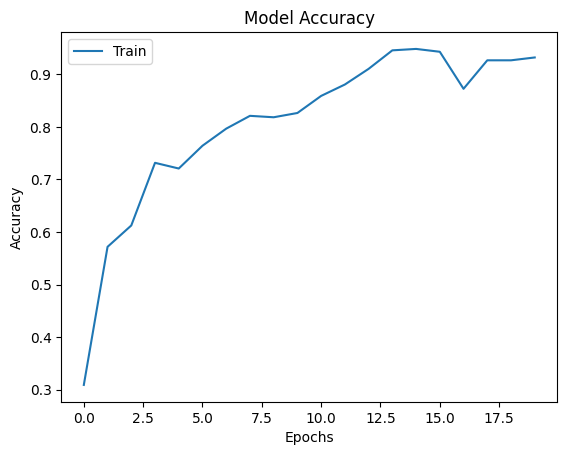

In [14]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'])
plt.show

In [15]:
model1= load_model('/content/drive/MyDrive/MidTerm/Flower/Flower_model.h5')

1/1 [==============================] - 1s 561ms/step
tulip


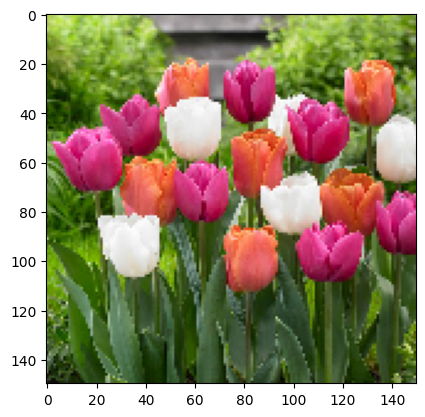

1/1 [==============================] - 0s 216ms/step
lilies


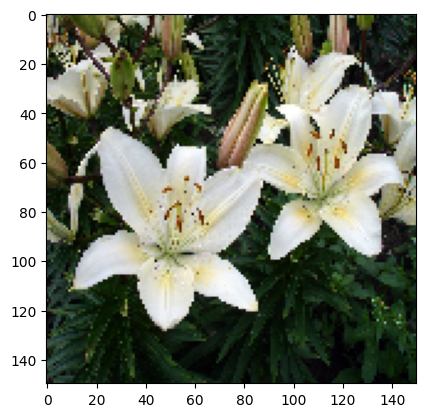

1/1 [==============================] - 0s 107ms/step
hydrangeas


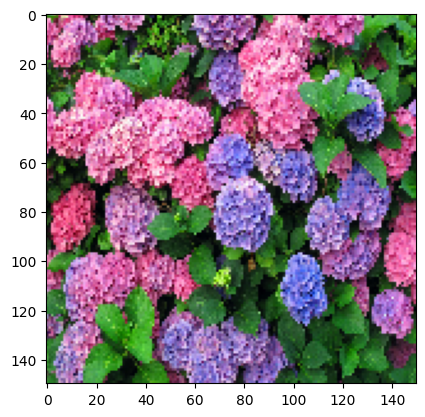

1/1 [==============================] - 0s 129ms/step
daisies


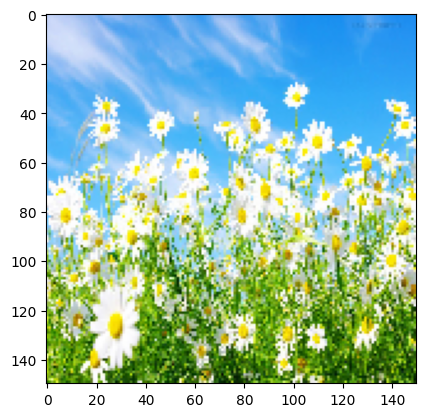

1/1 [==============================] - 0s 78ms/step
bougainvillea


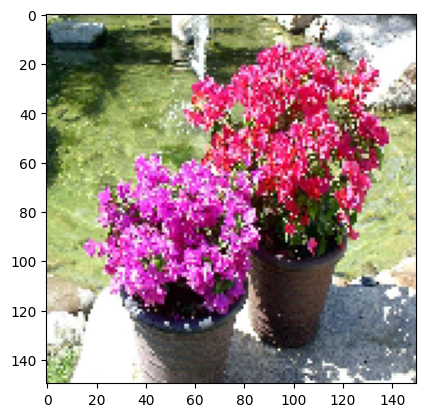

In [17]:
Test="/content/drive/MyDrive/MidTerm/Flower/Test"

for i in os.listdir(Test):
  img=load_img(Test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model1.predict(img).argmax())
  class_name=['bougainvillea','daisies','hydrangeas','lilies', 'tulip']
  print(class_name[result])
  plt.show()

